In [1]:
import pandas as pd

In [2]:
snpcalls_asian = pd.read_table('./data/genome_Hong_ChangBum_v2_Full_20190106202606.txt', 
                               comment='#', names=['name', 'chrom', 'position', 'genotype'], low_memory=False)

In [3]:
snpcalls_asian.head()

,name,chrom,position,genotype
0,rs3094315,1,752566,AA
1,rs3934834,1,1005806,CC
2,rs9442372,1,1018704,GG
3,rs3737728,1,1021415,GG
4,rs11260588,1,1021658,GG


In [4]:
snpcalls_european = pd.read_table('./data/genome_Lilly_Mendel_Mom__20080505171156.txt', 
                                  comment='#', names=['name', 'chrom', 'position', 'genotype'], low_memory=False)

In [5]:
snpcalls_european.head()

,name,chrom,position,genotype
0,rs3094315,1,742429,AA
1,rs12562034,1,758311,AG
2,rs3934834,1,995669,CT
3,rs9442372,1,1008567,AG
4,rs3737728,1,1011278,GG


In [6]:
snpcalls = pd.merge(
    snpcalls_asian[['name','chrom','position', 'genotype']], snpcalls_european[['name','chrom','position', 'genotype']],
    how='inner', left_on=['name','chrom','position'], right_on=['name','chrom','position'], suffixes=['_asian', '_european'])

snpcalls.head()

,name,chrom,position,genotype_asian,genotype_european
0,rs1136388,17,53011,CT,CC
1,rs11654695,17,58980,CT,TT
2,rs11649979,17,60225,CC,CC
3,rs12938802,17,60532,CC,CT
4,rs7226358,17,65351,CT,TT


In [7]:
def genotype_ibd (maternal, paternal):
  r = [0,0]
  if len(maternal) == len(paternal):
    if maternal[0] == paternal[0]:
      r[0] += 1
    if len(maternal) >= 2 or len(paternal) >= 2:
      if maternal[1] == paternal[1]:
        r[1] += 1

  ibd = int(r[0]) + int(r[1])
  return ibd

In [8]:
ibd_cal = pd.DataFrame(
    snpcalls.apply(lambda row:genotype_ibd(row['genotype_asian'],
                                                    row['genotype_european']),axis=1).tolist(),
    index=snpcalls.index,
    columns='IBD'.split())

In [9]:
ibd_cal.head()

,IBD
0,1
1,1
2,2
3,1
4,1


In [10]:
ibd_cal = pd.concat([snpcalls,ibd_cal],axis=1,join_axes=[snpcalls.index])
ibd_cal.head()

,name,chrom,position,genotype_asian,genotype_european,IBD
0,rs1136388,17,53011,CT,CC,1
1,rs11654695,17,58980,CT,TT,1
2,rs11649979,17,60225,CC,CC,2
3,rs12938802,17,60532,CC,CT,1
4,rs7226358,17,65351,CT,TT,1


In [11]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

In [12]:
plt.figure()
plt.style.use('ggplot')
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 20

ibd_cal['IBD'].value_counts()

0    55
1    23
2    22
Name: IBD, dtype: int64

<Figure size 432x288 with 0 Axes>

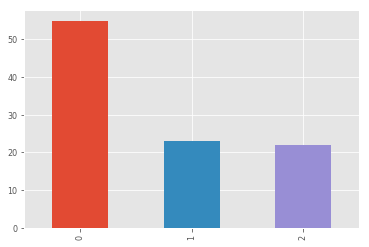

In [13]:
fig, ax =plt.subplots()
ibd_cal['IBD'].value_counts().plot(ax=ax, kind='bar')

In [14]:
ibd_cal[['chrom','position','IBD']].to_csv('./data/ibd.txt',index=False)